<a href="https://colab.research.google.com/github/devangi2000/DataAnalysis/blob/master/Air_Pollution_in_India_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas as gpd
#import geoplot
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install geopandas

In [3]:
import geopandas as gpd


In [4]:
from google.colab import files
!pip install -q kaggle

In [5]:
uploaded = files.upload()

Saving data_air.csv to data_air.csv


In [6]:
!ls

data_air.csv  sample_data


In [7]:
df = pd.read_csv('data_air.csv', encoding='ISO-8859-1')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['year'] = df['year'].fillna(df['year'].min())
df['year'] = df['year'].values.astype('int')

In [9]:
def nullValues(df):
  total = df.isnull().sum().sort_values(ascending=False)
  total = total[df.isnull().sum().sort_values(ascending=False)!=0]
  percent = (total/len(df)) * 100
  percent = percent[df.isnull().sum().sort_values(ascending=False)!=0]
  concat = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  print(concat)

In [10]:
nullValues(df)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
location                          3   0.000688
sampling_date                     3   0.000688


In [11]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

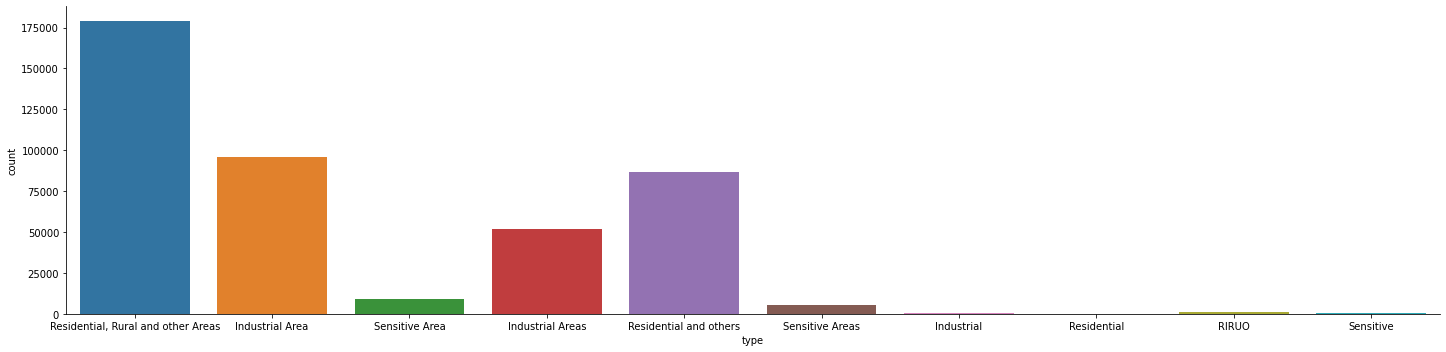

In [12]:
sns.catplot(x='type', kind='count', data = df, height=5, aspect = 4)

In [13]:
grp = df.groupby(['type']).mean()['so2'].to_frame()
grp

,so2
type,
Industrial,27.130601
Industrial Area,13.212287
Industrial Areas,13.765723
RIRUO,10.912577
Residential,15.227778
Residential and others,10.246096
"Residential, Rural and other Areas",9.218447
Sensitive,10.486184
Sensitive Area,5.263545


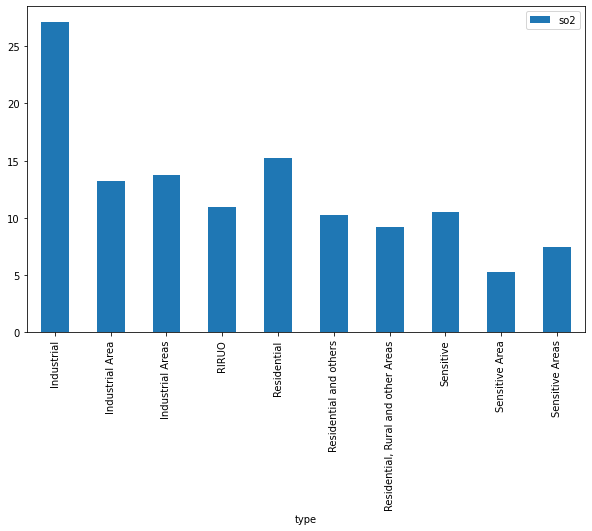

In [14]:
grp.plot.bar(figsize=(10,6))

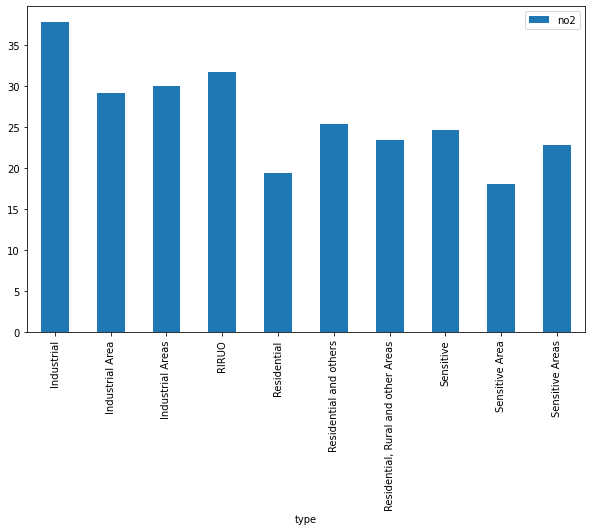

In [15]:
grp2 = df.groupby(['type']).mean()['no2'].to_frame()
grp2.plot.bar(figsize=(10,6))

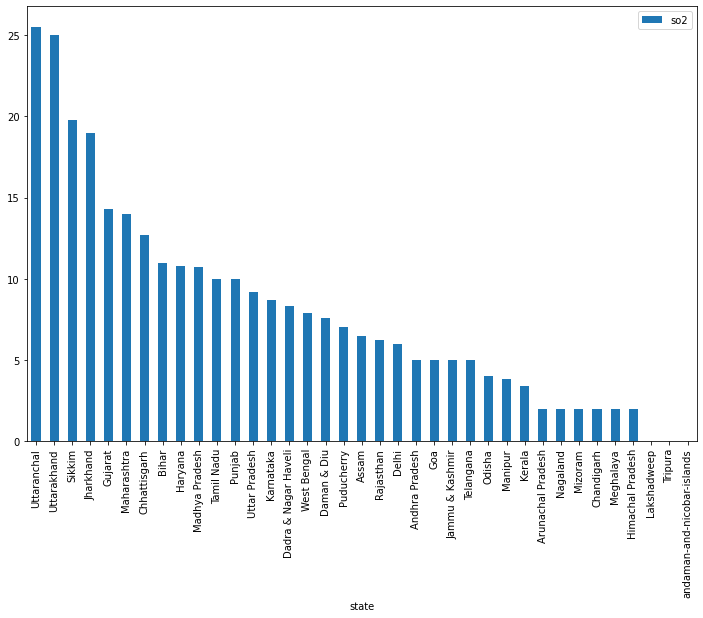

In [16]:
df2 = df[['so2','state']].groupby(['state']).median().sort_values('so2', ascending=False).plot.bar(figsize=(12,8))
df2

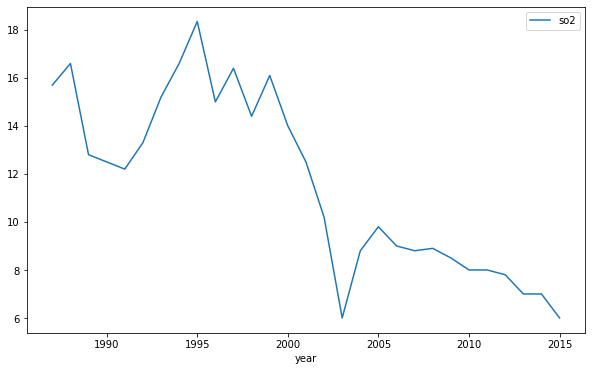

In [17]:
df[['so2', 'year', 'state']].groupby(['year']).median().sort_values('year',ascending=False).plot(figsize=(10,6))

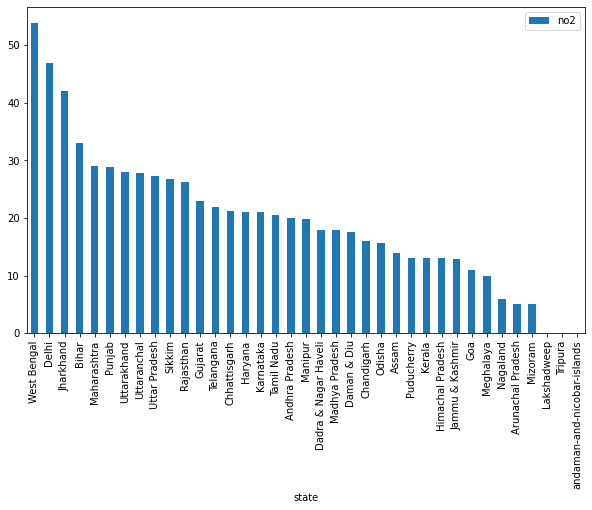

In [18]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(10,6))

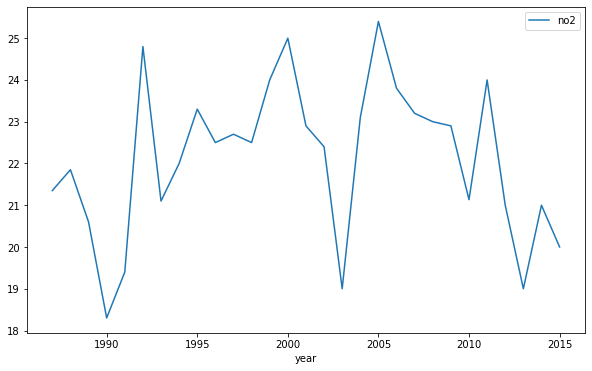

In [19]:
df[['no2', 'year', 'state']].groupby(['year']).median().sort_values('year', ascending=False).plot(figsize=(10,6))

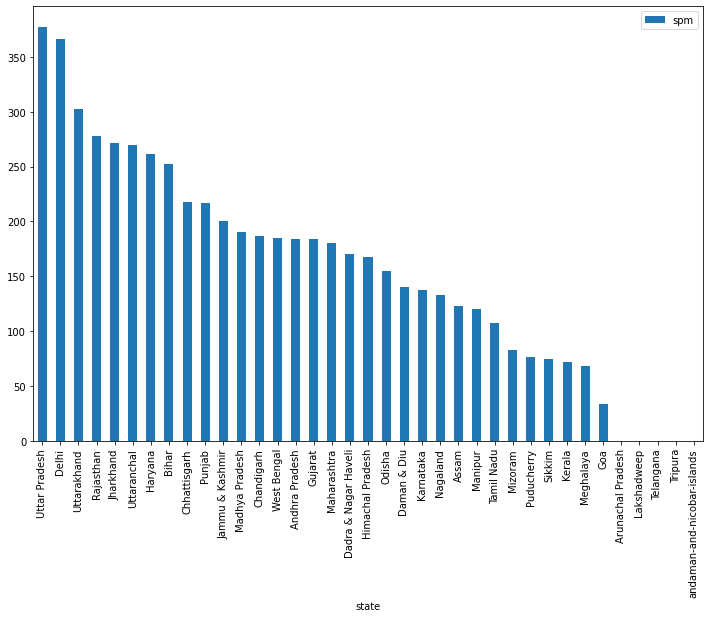

In [20]:
df[['spm', 'state']].groupby(['state']).median().sort_values('spm',ascending=False).plot.bar(figsize=(12,8))

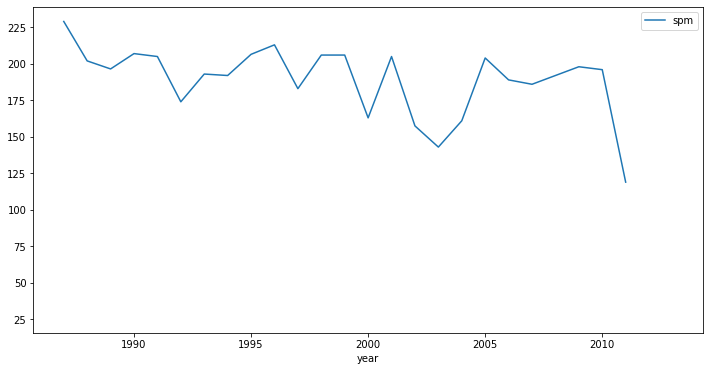

In [21]:

df[['spm', 'year', 'state']].groupby(['year']).median().sort_values('year', ascending=False).plot(figsize=(12,6))

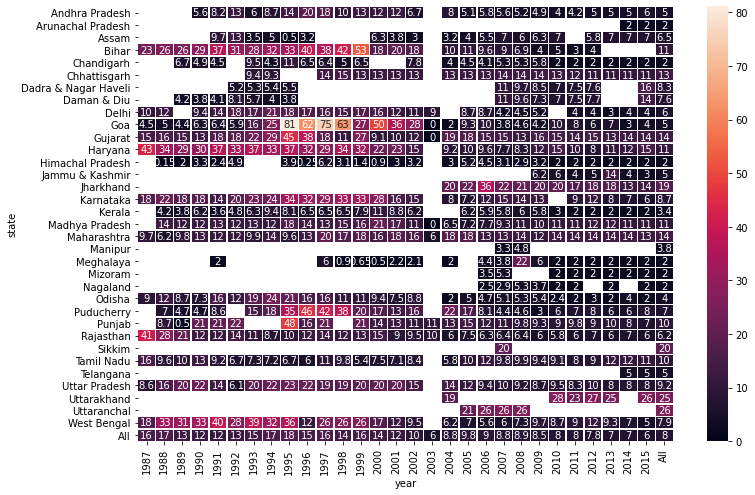

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.pivot_table('so2', index='state', aggfunc='median', columns=['year'],margins=True) , ax=ax, annot=True, linewidth=0.5 )

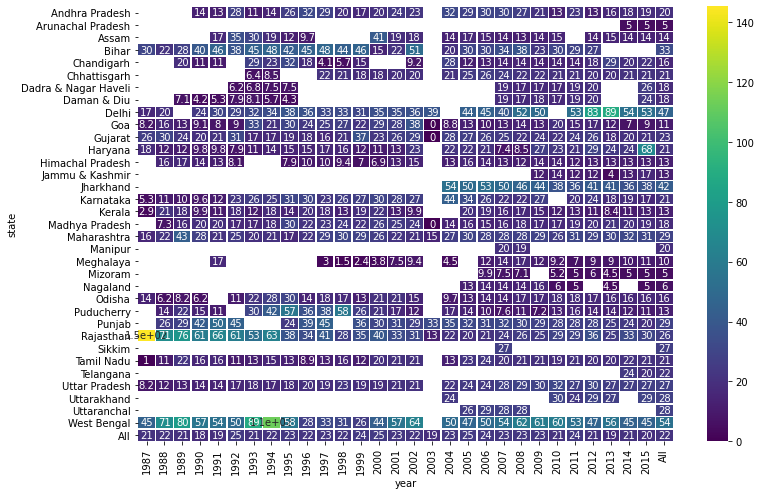

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.pivot_table('no2', index='state', aggfunc='median', columns=['year'],margins=True) , ax=ax, annot=True, linewidth=0.5, cmap='viridis')

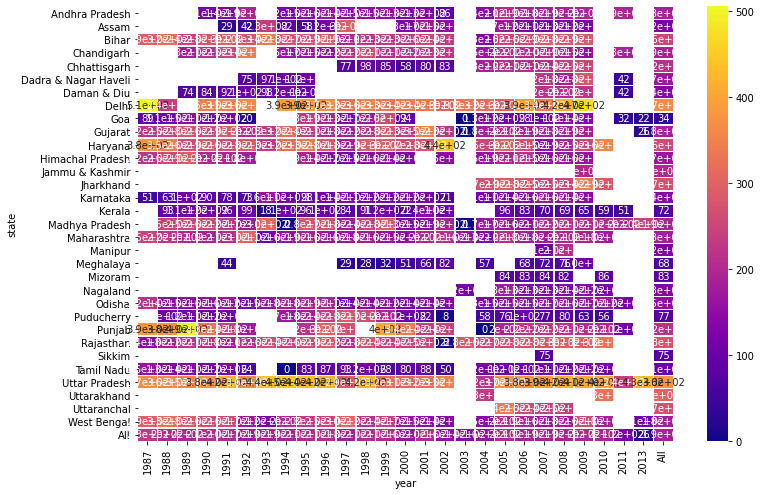

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.pivot_table('spm', index='state', aggfunc='median', columns=['year'],margins=True) , ax=ax, annot=True, linewidth=0.5, cmap='plasma')

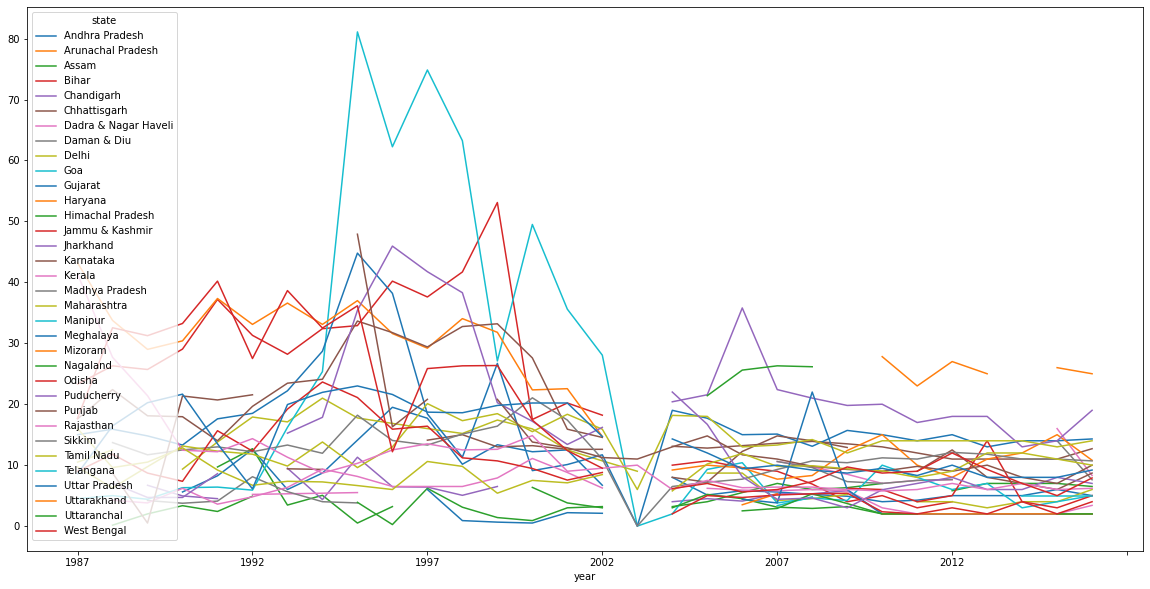

In [25]:
temp = df.pivot_table('so2', index='year', columns=['state'], aggfunc='median', margins=True).reset_index()
temp.drop('All', inplace=True, axis=1)
temp = temp.set_index('year')
temp.plot(figsize=(20,10))

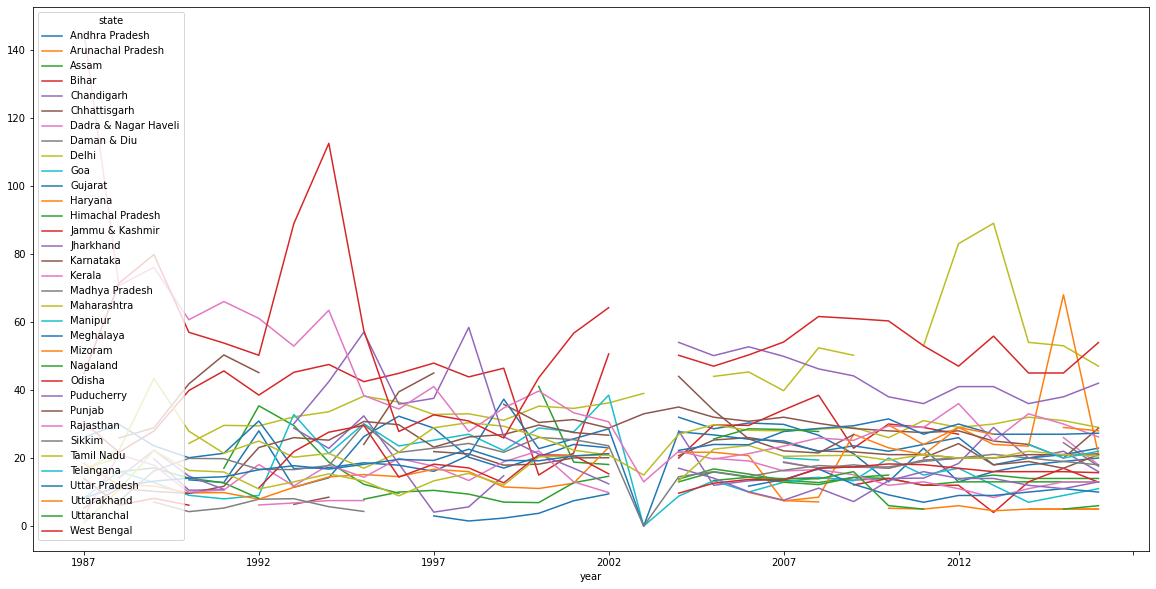

In [26]:
temp = df.pivot_table('no2', index='year', columns=['state'], aggfunc='median', margins=True).reset_index()
temp.drop('All', inplace=True, axis=1)
temp = temp.set_index('year')
temp.plot(figsize=(20,10))

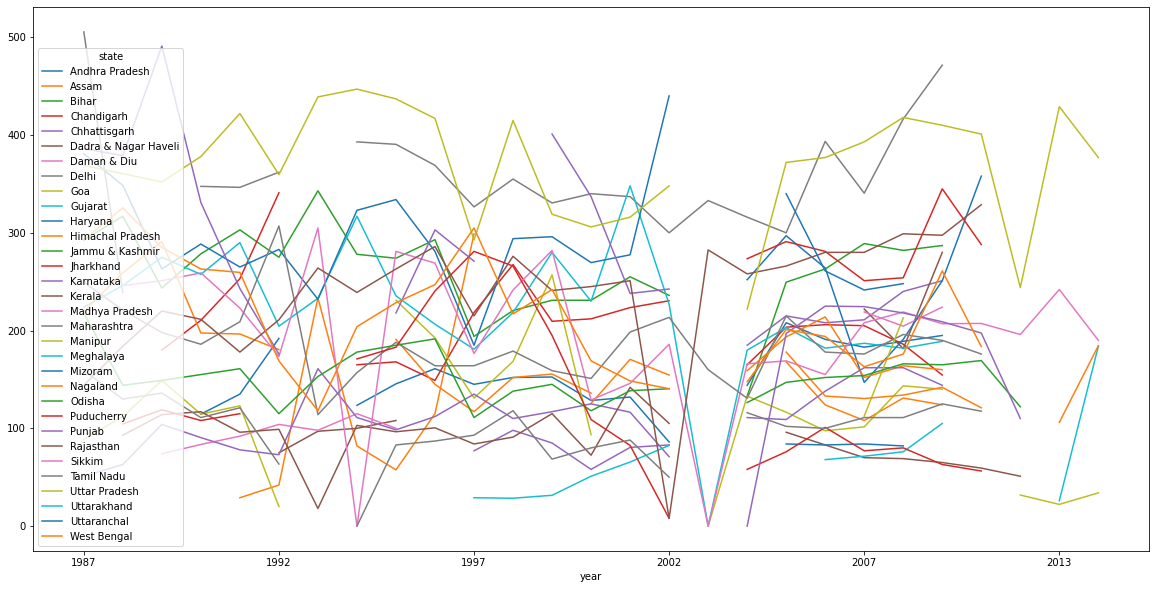

In [27]:
temp = df.pivot_table('spm', index='year', columns=['state'], aggfunc='median', margins=True).reset_index()
temp.drop('All', inplace=True, axis=1)
temp = temp.set_index('year')
temp.plot(figsize=(20,10))